# Bibliotecas

In [ ]:
from metapy_toolbox import *
import pandas as pd
import os
pd.set_option('display.max_columns', None)
import numpy as np
from joblib import Parallel, delayed
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
from matplotlib.ticker import ScalarFormatter as _ScalarFormatter
import math
mpl.rcParams.update({
                        'font.family': 'serif',
                        'mathtext.fontset': 'cm',
                        'axes.unicode_minus': False
                    })
from fundacao import *

# Carregando dados

In [2]:
from pathlib import Path
dir=Path.cwd()
file_path=dir / "assets" / "toy_problem_copy.xlsx"
# df = pd.read_excel(r"/home/wmpjrufg/Documents/fundaIA/assets/toy_problem.xlsx") # Prof. Wanderlei
df = pd.read_excel(file_path) # Prof. Wanderlei casa
# df = pd.read_excel(r"C:\git-projetos\fundaIA\assets\toy_problem_copy_2.xlsx") # Prof. Wanderlei casa
# df = pd.read_excel(r"C:\git-projetos\fundaIA\assets\toy_problem_copy_3.xlsx") # Prof. Wanderlei casa
n_comb = 3
f_ck = 25000
cob_m = 0.04


# Pop inicial de possíveis soluções

In [ ]:
n_population = 1000
n_population2 = 2000
n_population3 = 500
seed = 42

In [4]:
x_lower = [0.60] * len(df) * 3
x_upper = [5.00] * len(df) * 3
n_dimensions = len(df) * 3
pop2d = initial_population_01(n_population, n_dimensions, x_lower, x_upper, seed, use_lhs=True)

# Gerando dataset completo

In [5]:
cols = []
for i in range(len(df)):
    cols.append(f'hx{i}')
    cols.append(f'hy{i}')
    cols.append(f'hz{i}')
df_pop_A = pd.DataFrame(pop2d, columns=cols)
args = [df, n_comb, f_ck, cob_m, 1e1]
def wrapper(x):
    return obj_teste(x, args)[0]
vol = Parallel(n_jobs=-1)(delayed(wrapper)(x) for x in pop2d)
df_pop_A['volume (m3)'] = vol
df_pop_A

,hx0,hy0,hz0,hx1,hy1,hz1,hx2,hy2,hz2,volume (m3)
0,1.837395,2.208469,0.776622,3.135732,1.250786,4.287307,1.709851,1.885741,3.032636,44.262898
1,2.859618,4.391168,2.685922,2.145967,2.699580,1.737649,3.159800,1.921960,0.956119,64.213892
2,4.353958,0.799621,3.377464,1.328840,0.872929,1.806070,4.358575,1.641944,1.592346,57.595488
3,1.893407,1.087721,0.671795,3.100323,1.180943,4.510166,3.066770,4.324734,2.526366,73.091506
4,2.117428,3.677907,4.264202,2.563853,0.941277,1.093536,2.488919,2.055026,4.653138,75.523403
...,...,...,...,...,...,...,...,...,...,...
995,3.145963,1.758638,3.769538,2.060789,1.525679,3.062927,3.568349,3.316092,1.530348,65.439096
996,4.105178,3.718863,2.155376,2.103395,3.262383,2.168449,1.814990,2.644283,2.074759,72.237644
997,1.189351,1.777888,0.718456,3.160661,2.377957,2.717646,3.329650,3.189257,3.541094,72.361463
998,2.013990,1.379563,2.872174,3.733906,1.782364,1.299702,2.245460,3.093099,1.964519,44.619441


In [6]:
cols = []
for i in range(len(df)):
    cols.append(f'hx{i}')
    cols.append(f'hy{i}')
    cols.append(f'hz{i}')
df_pop_B = pd.DataFrame(pop2d, columns=cols)
args = [df, n_comb, f_ck, cob_m, 1e6]
def wrapper(x):
    return obj_teste(x, args)[0]
vol = Parallel(n_jobs=-1)(delayed(wrapper)(x) for x in pop2d)
df_pop_B['volume (m3)'] = vol
df_pop_B

,hx0,hy0,hz0,hx1,hy1,hz1,hx2,hy2,hz2,volume (m3)
0,1.837395,2.208469,0.776622,3.135732,1.250786,4.287307,1.709851,1.885741,3.032636,1.451819e+06
1,2.859618,4.391168,2.685922,2.145967,2.699580,1.737649,3.159800,1.921960,0.956119,1.461400e+06
2,4.353958,0.799621,3.377464,1.328840,0.872929,1.806070,4.358575,1.641944,1.592346,3.234635e+06
3,1.893407,1.087721,0.671795,3.100323,1.180943,4.510166,3.066770,4.324734,2.526366,2.168826e+06
4,2.117428,3.677907,4.264202,2.563853,0.941277,1.093536,2.488919,2.055026,4.653138,1.587680e+06
...,...,...,...,...,...,...,...,...,...,...
995,3.145963,1.758638,3.769538,2.060789,1.525679,3.062927,3.568349,3.316092,1.530348,1.684548e+06
996,4.105178,3.718863,2.155376,2.103395,3.262383,2.168449,1.814990,2.644283,2.074759,1.449541e+06
997,1.189351,1.777888,0.718456,3.160661,2.377957,2.717646,3.329650,3.189257,3.541094,1.281400e+06
998,2.013990,1.379563,2.872174,3.733906,1.782364,1.299702,2.245460,3.093099,1.964519,1.434544e+06


In [7]:
of_1e1, _ = obj_teste(pop2d[0], [df, n_comb, f_ck, cob_m, 1e1])
of_1e6, _ = obj_teste(pop2d[0], [df, n_comb, f_ck, cob_m, 1e6])
print(of_1e1, of_1e6)

44.26289801647906 1451818.7514606304


In [8]:
oi = df_pop_A.sort_values(by="volume (m3)", ascending=True)

oi

,hx0,hy0,hz0,hx1,hy1,hz1,hx2,hy2,hz2,volume (m3)
271,1.230273,2.778010,1.373694,3.762709,1.275226,0.734282,1.147485,1.541384,1.619021,21.773689
888,0.911987,2.694999,1.484156,1.997708,2.038205,1.605492,3.445778,1.493411,0.861539,26.746431
197,4.195318,1.653191,0.742903,1.639664,1.390031,1.122077,1.099542,4.559253,0.926495,27.707186
486,1.424602,2.403253,2.180816,4.779141,1.242856,0.841885,2.555703,3.458592,0.651810,29.428517
62,1.380620,1.139030,2.733630,1.289728,2.048288,1.151595,1.160344,2.216251,2.009043,29.584802
...,...,...,...,...,...,...,...,...,...,...
301,4.275572,4.401723,1.615312,3.045301,4.383386,2.514614,4.761404,4.487386,4.670040,180.841054
678,3.592683,3.117525,1.566110,4.612946,3.147689,4.713431,3.489182,4.623359,4.977627,183.991864
636,4.349678,4.837721,4.869538,4.760981,0.618012,3.612686,4.030788,4.300900,3.100604,184.476112
404,4.098783,4.017847,4.349660,4.944849,4.241983,4.172667,2.761210,0.801624,4.115372,191.103808


# Aprendizado de máquina do dataset

### Separação em x e y

In [9]:
# x = df_pop.drop(columns=['volume (m3)'])
# y = df_pop [['volume (m3)']].reset_index(drop=True)
# y

### Treinamento com adição de amostras

In [ ]:
# x_treino, x_teste, y_treino, y_teste= train_test_split(x, y, test_size=0.30, random_state=seed)
# df_gpr = aprendizado_maquina_paralelo(x_treino, y_treino, x_teste, y_teste)

In [10]:
def roda_pipe(df_pop_base, test_size=0.30):
    X= df_pop_base.drop(columns=['volume (m3)'])
    y= df_pop_base [['volume (m3)']].reset_index(drop=True)
    x_treino, x_teste, y_treino, y_teste= train_test_split(X, y, test_size=test_size, random_state=seed)
    df_gpr = aprendizado_maquina_paralelo(x_treino, y_treino, x_teste, y_teste)
    return df_gpr

In [11]:
df_gpr_A = roda_pipe(df_pop_A)
df_gpr_B = roda_pipe(df_pop_B)

/Users/lucasteixeira/Documents/Iniciacao_cientifica/fundaIA/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:450: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/lucasteixeira/Documents/Iniciacao_cientifica/fundaIA/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:450: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/lucasteixeira/Documents/Iniciacao_cientifica/fundaIA/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:670: ConvergenceWarning: lbfgs failed to converge after 7 iteration(s) (status=2):
ABNORMAL: 

You might also want to scale the data as shown in:
    https:/

In [47]:
df_gpr_test_s10 = roda_pipe(df_pop_A, test_size=0.10)
df_gpr_test_s20 = roda_pipe(df_pop_A, test_size=0.20)
df_gpr_test_s40 = roda_pipe(df_pop_A, test_size=0.40)
df_gpr_test_s50 = roda_pipe(df_pop_A, test_size=0.50)

/Users/lucasteixeira/Documents/Iniciacao_cientifica/fundaIA/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:450: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/lucasteixeira/Documents/Iniciacao_cientifica/fundaIA/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:450: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/lucasteixeira/Documents/Iniciacao_cientifica/fundaIA/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:450: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing 

#### Gráficos

In [54]:
def pega_resultado_por_modelo(df_gpr, modelo_alvo):
    for item in df_gpr:
        if str(item["modelo"]) == str(modelo_alvo):
            return item
    raise ValueError(f"Modelo '{modelo_alvo}' não encontrado em df_gpr.")

In [55]:
modelo_fixado = "gpr_com_kernel_k00"
res_A = pega_resultado_por_modelo(df_gpr_A, modelo_fixado)  # pen=1e6
res_B = pega_resultado_por_modelo(df_gpr_B, modelo_fixado)  # pen=1e1


In [97]:
def scatter_obs_pred_ax(ax, res, n_train, n_test=None, lims=None, point_color="red"):
    data = pd.DataFrame({
        "Observed": list(res["y_obse"]["volume (m3)"]),
        "Predicted": list(res["y_pred"]["volume (m3)"]),
    })

    # Eixos em português
    ax.set_xlabel(r"Volume observado (m$^3$)", fontsize=12)
    ax.set_ylabel(r"Volume predito (m$^3$)", fontsize=12)
    ax.tick_params(axis="both", which="major", labelsize=12)
    ax.grid(True, linestyle="-", linewidth=0.5, alpha=0.3)

    # limites
    if lims is None:
        vmin = min(data.min())
        vmax = max(data.max())
        lims = [vmin, vmax]

    ax.plot(lims, lims, linewidth=2, linestyle="--")
    ax.set_xlim(lims)
    ax.set_ylim(lims)

    # pontos
    ax.scatter(data["Observed"], data["Predicted"], alpha=0.4, s=25, color=point_color)

    # notação científica
    fmt = mticker.ScalarFormatter(useMathText=True)
    fmt.set_scientific(True)
    fmt.set_powerlimits((-2, 3))
    ax.xaxis.set_major_formatter(fmt)
    ax.yaxis.set_major_formatter(fmt)

    # n_test (se não vier)
    if n_test is None:
        try:
            n_test = len(res["y_obse"]["volume (m3)"])
        except Exception:
            n_test = "n/a"

    modelo_txt = str(res.get("modelo", "n/a"))

    # --- bloco único com box + espaçamento ---
    # o "  " antes do modelo cria espaço para a bolinha
    info = (
        f"       {modelo_txt}\n"
        f"Treino: {n_train} | Teste: {n_test}\n"
        f"$R^2_{{teste}}$: {res['R2_Teste']:.3f}"
    )

    ax.text(
        0.03, 0.97, info,
        transform=ax.transAxes,
        va="top", ha="left",
        fontsize=10,
        linespacing=1.25,  # espaçamento entre linhas
        bbox=dict(
            boxstyle="round,pad=0.30",
            facecolor="white",
            alpha=0.85,
            edgecolor="0.6"
        )
    )

    # bolinha dentro da box
    ax.plot(
        [0.045], [0.955],
        marker="o", markersize=7, color=point_color,
        transform=ax.transAxes, clip_on=False
    )

    return lims

In [ ]:
def plot_side_by_side(res_left, res_right, n_train, n_test, out_path=None, dpi=600):
    b_cm, h_cm = 24, 12
    inches = 1 / 2.54

    fig, axes = plt.subplots(1, 2, figsize=(b_cm * inches, h_cm * inches), constrained_layout=False)

    scatter_obs_pred_ax(axes[0], res_left,  n_train=n_train, n_test=n_test, lims=None, point_color="red")
    scatter_obs_pred_ax(axes[1], res_right, n_train=n_train, n_test=n_test, lims=None, point_color="red")

    axes[1].set_ylabel("")

    # margens mais seguras (evita cortar tick e evita o “20(a)”)
    fig.subplots_adjust(left=0.08, right=0.99, top=0.98, bottom=0.20, wspace=0.10)

    # rótulos (a) e (b) fora e mais abaixo
    pos0 = axes[0].get_position()
    pos1 = axes[1].get_position()
    y_offset = 0.06  # mais embaixo para não encostar no eixo/ticks

    fig.text(pos0.x0, pos0.y0 - y_offset, "(a)", ha="left", va="top",
             fontsize=12, fontweight="bold")
    fig.text(pos1.x0, pos1.y0 - y_offset, "(b)", ha="left", va="top",
             fontsize=12, fontweight="bold")

    outh_path = os.path.join("assets/graphics", out_path)
    if out_path is not None:
        fig.savefig(out_path, dpi=dpi, bbox_inches="tight", pad_inches=0.05)

    plt.show()
    plt.close(fig)

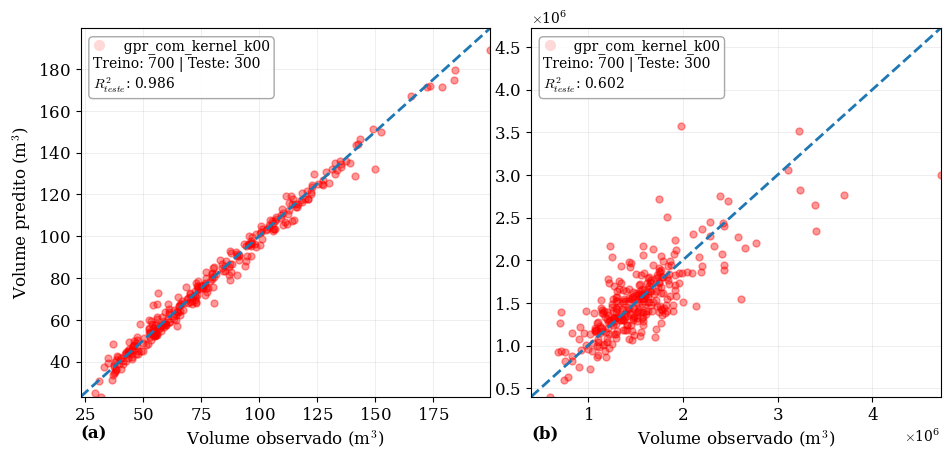

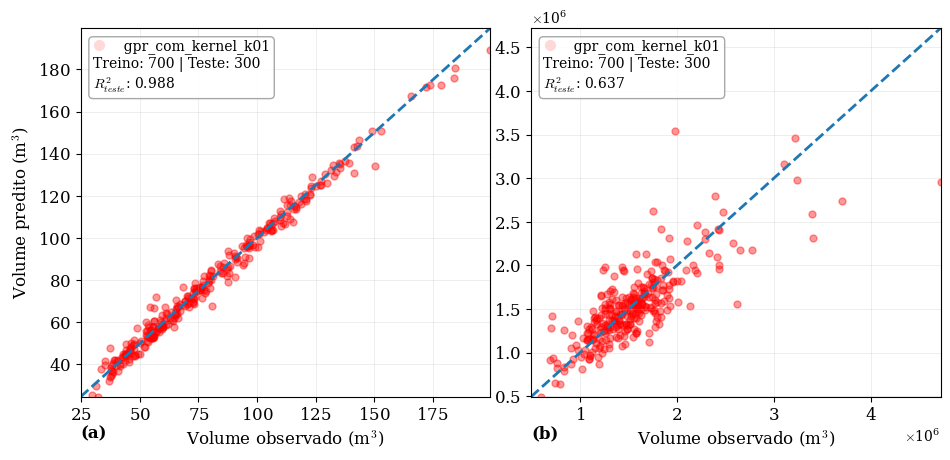

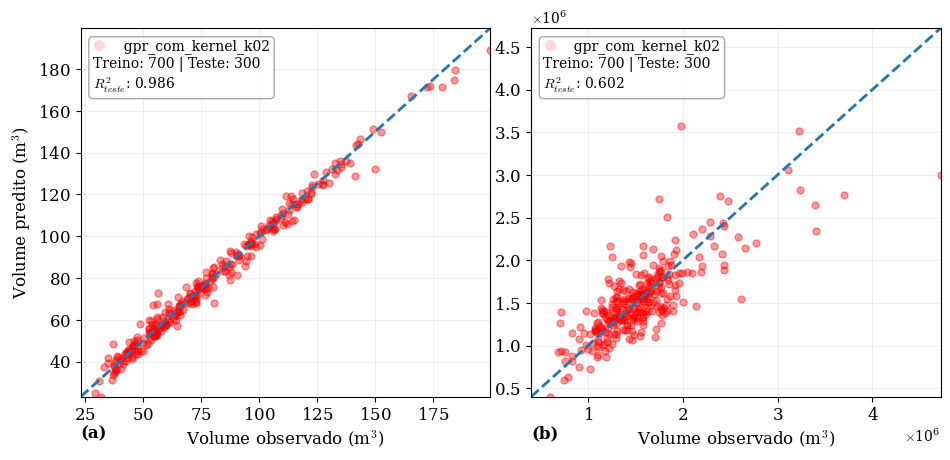

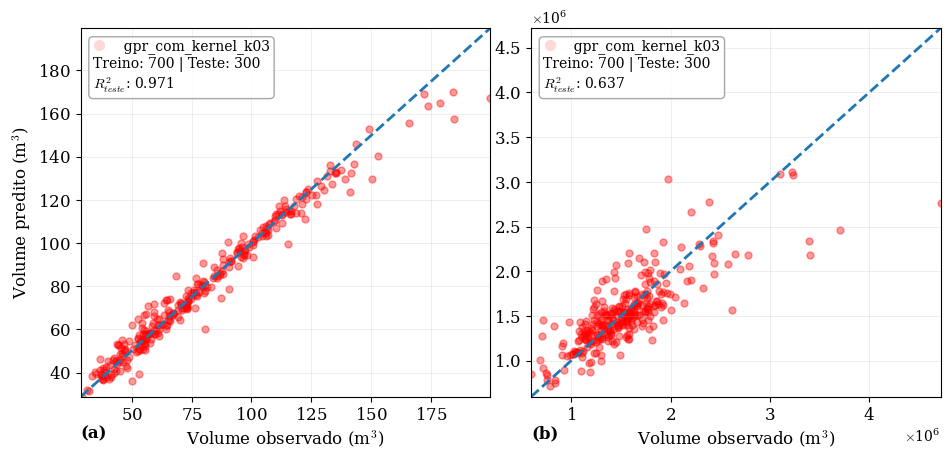

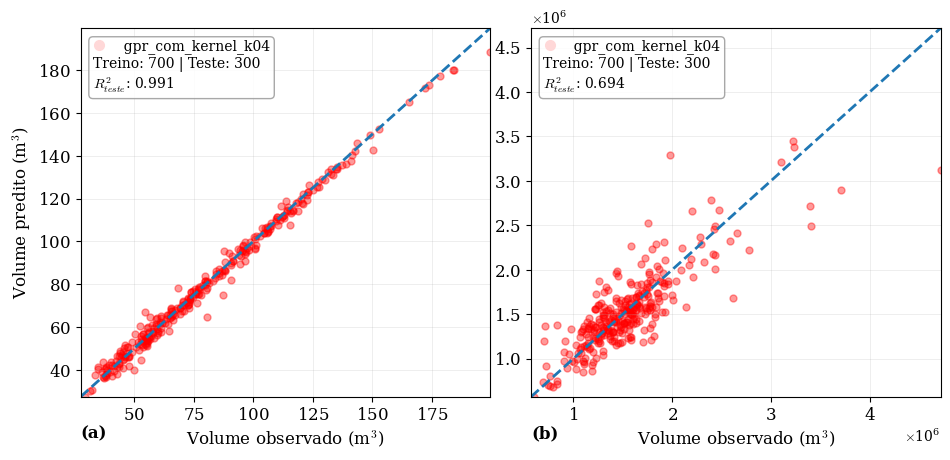

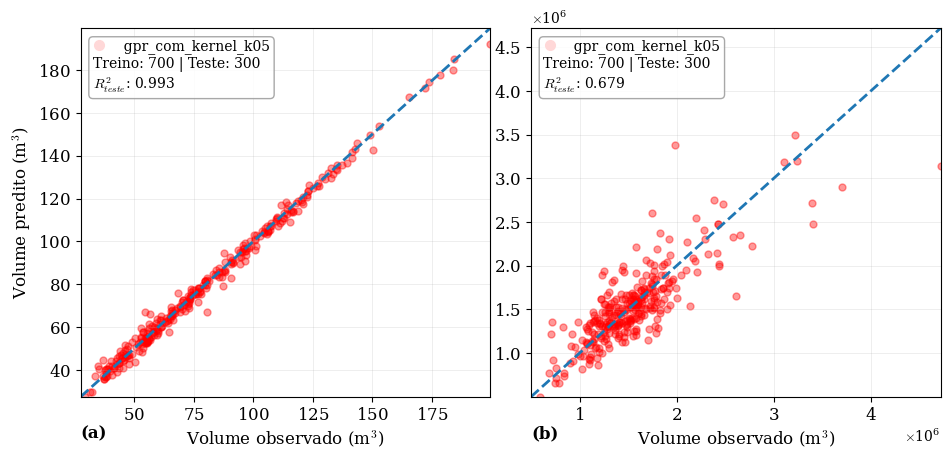

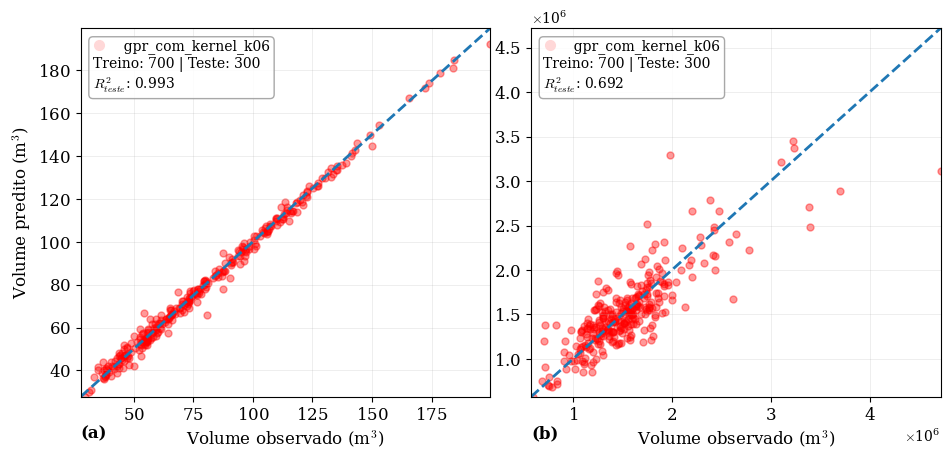

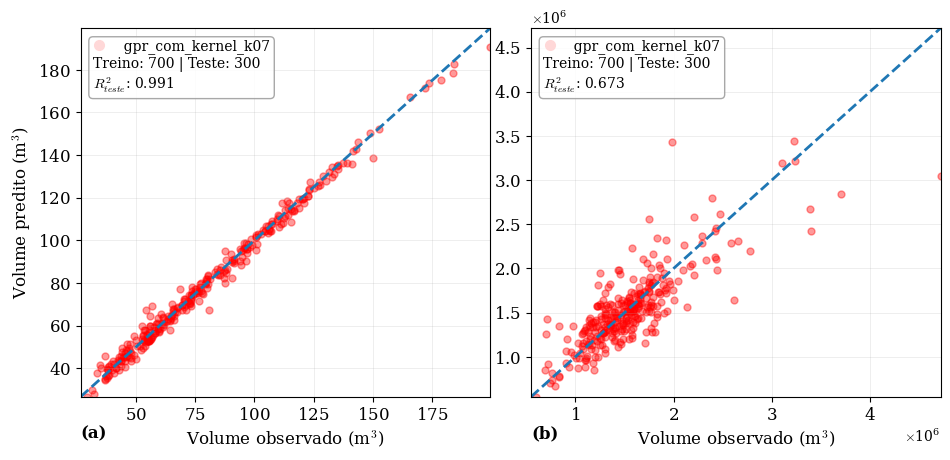

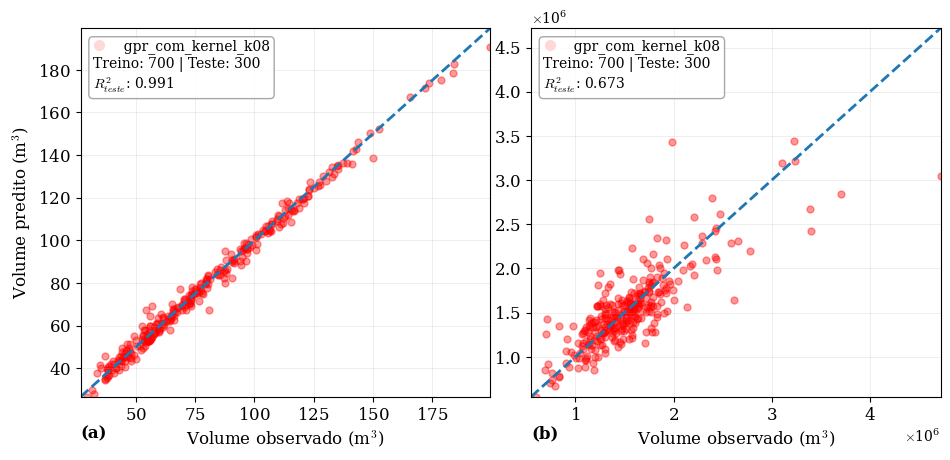

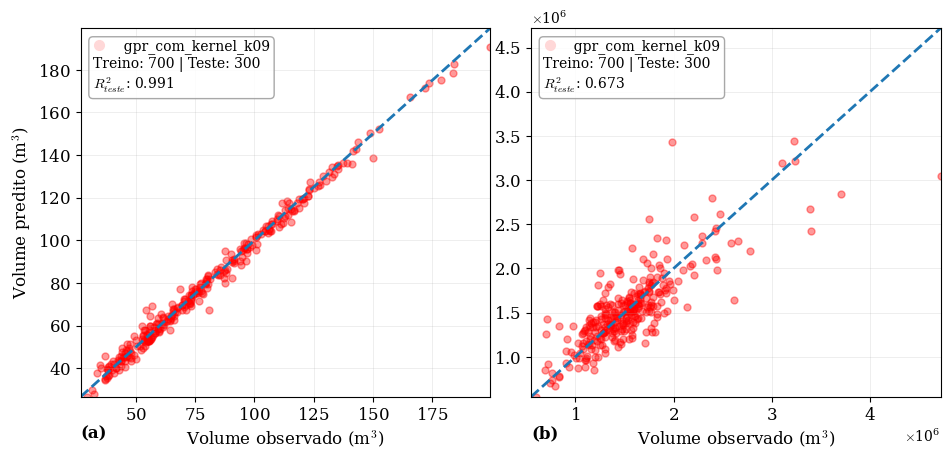

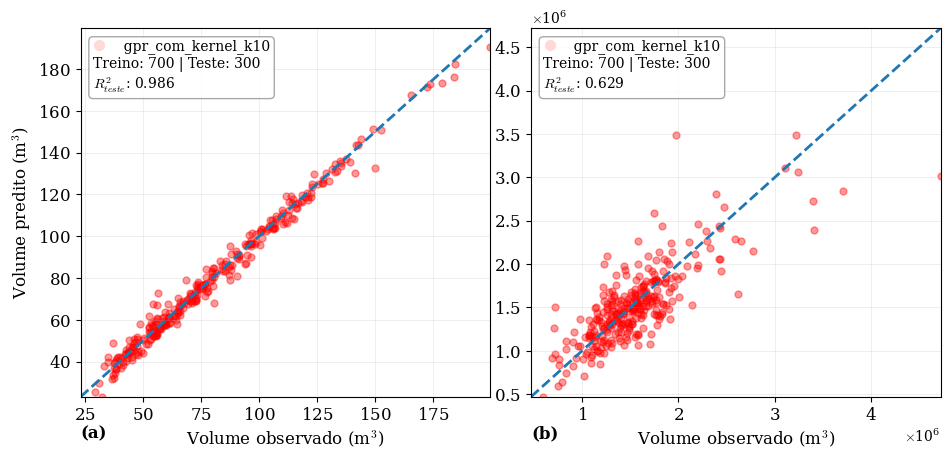

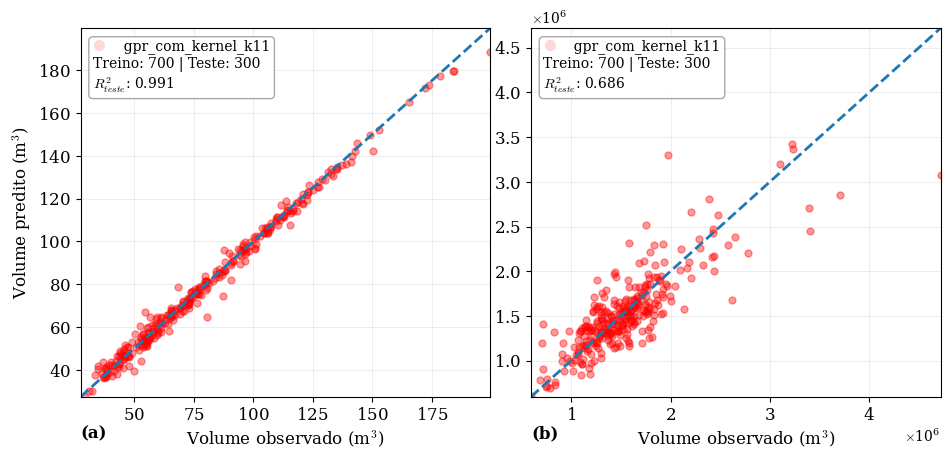

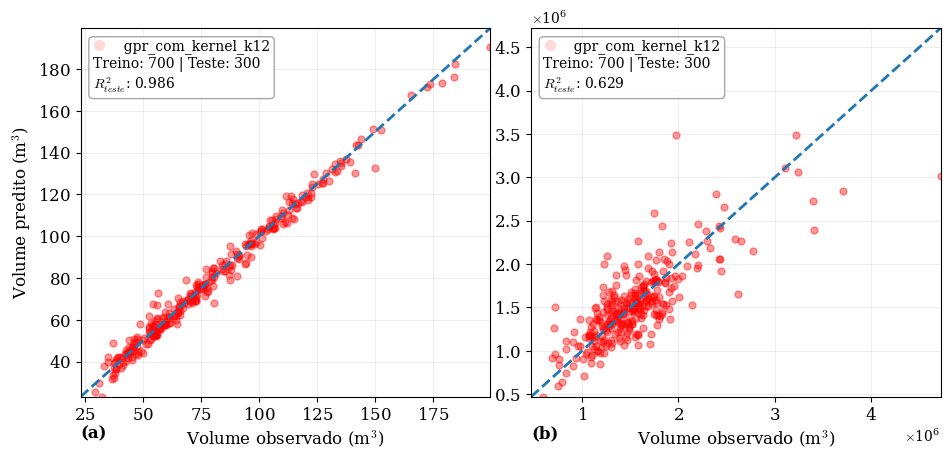

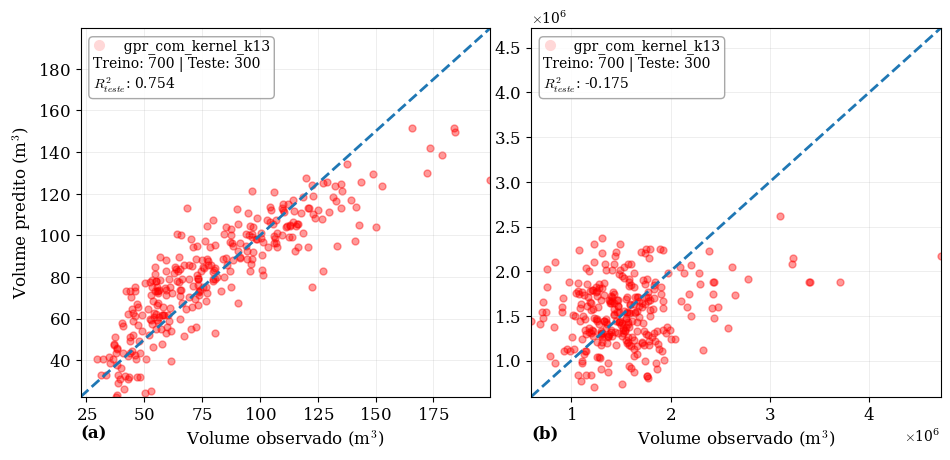

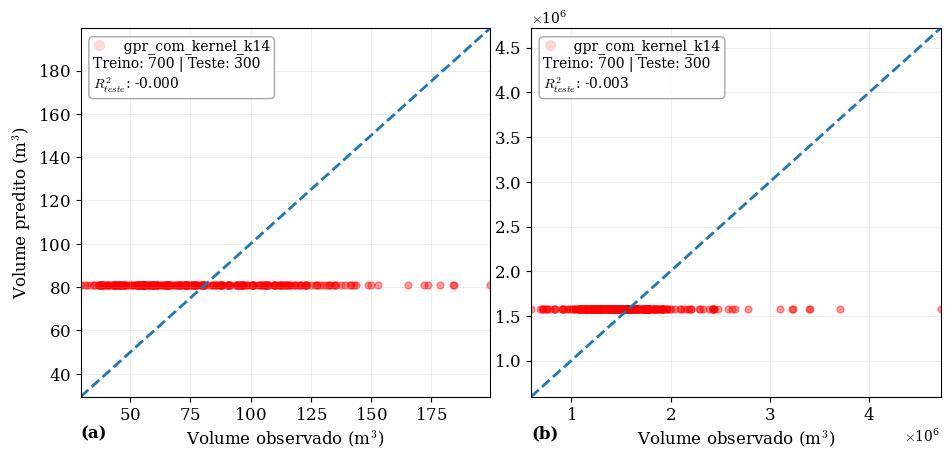

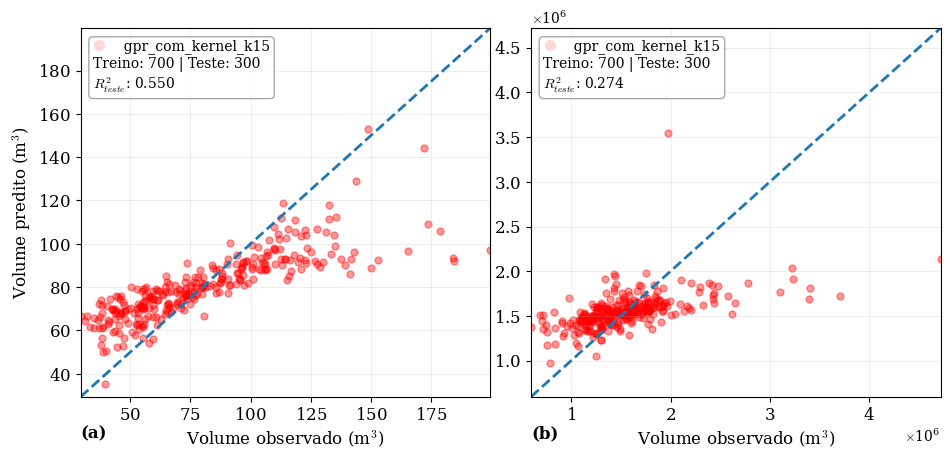

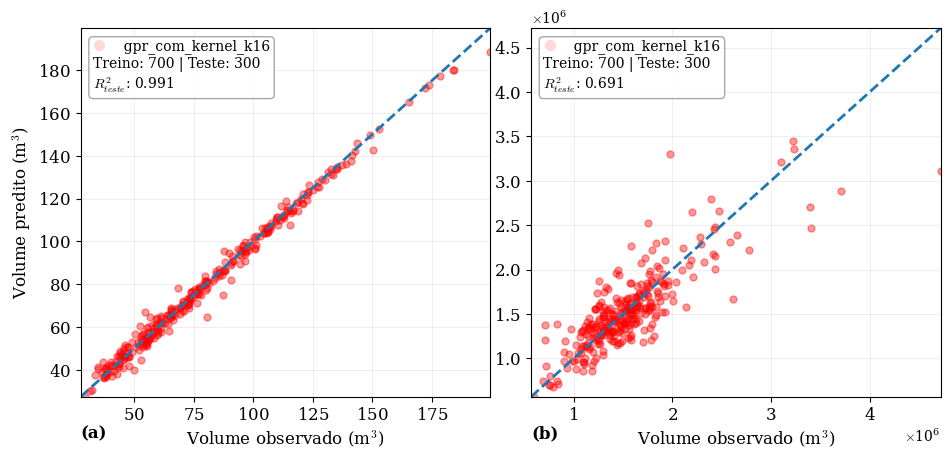

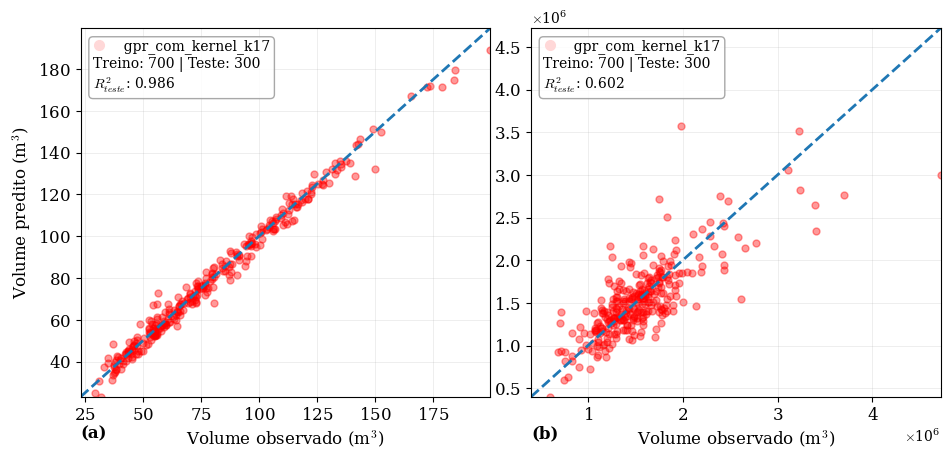

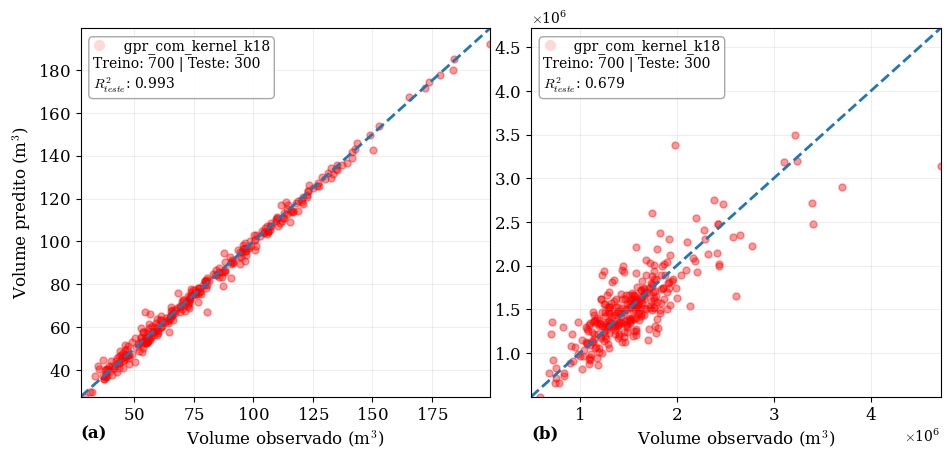

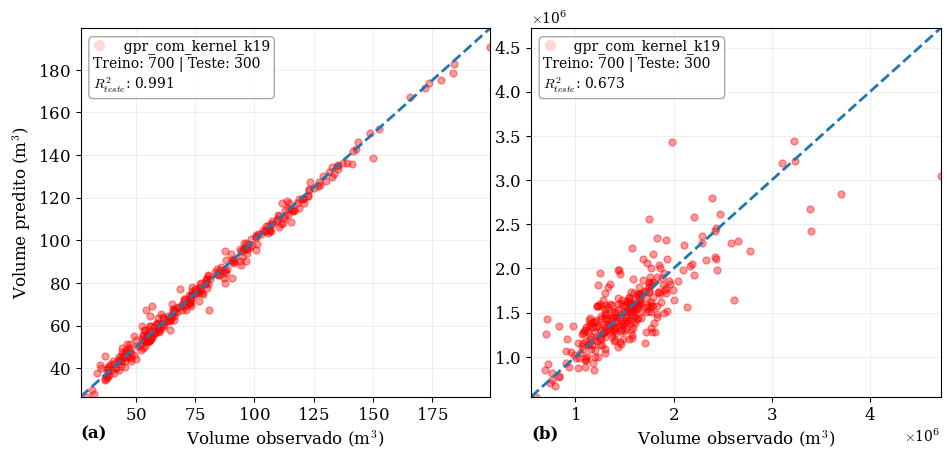

In [98]:
N = len(df_pop_A)
n_treino = int((1 - 0.30) * N)
n_test = N - n_treino

modelos = [str(r["modelo"]) for r in df_gpr_A]

for modelo in modelos:
    res_A = pega_resultado_por_modelo(df_gpr_A, modelo)
    res_B = pega_resultado_por_modelo(df_gpr_B, modelo)

    plot_side_by_side(
        res_left=res_A,
        res_right=res_B,
        n_train=n_treino,
        n_test=n_test,
        out_path=f"z_GPR_{modelo}_pen_1e1_vs_1e6.png"
    )

In [ ]:
def plot_side_by_side_02(res_low, res_high, n_train1, n_test1, n_train2, n_test2, out_path=None, dpi=600):
    # limites globais (mesma escala nos dois painéis)
    obs_low  = np.array(list(res_low["y_obse"]["volume (m3)"]))
    pred_low = np.array(list(res_low["y_pred"]["volume (m3)"]))
    obs_high  = np.array(list(res_high["y_obse"]["volume (m3)"]))
    pred_high = np.array(list(res_high["y_pred"]["volume (m3)"]))

    vmin = min(obs_low.min(), pred_low.min(), obs_high.min(), pred_high.min())
    vmax = max(obs_low.max(), pred_low.max(), obs_high.max(), pred_high.max())
    lims = [vmin, vmax]

    # figura
    b_cm, h_cm = 24, 12
    inches = 1 / 2.54
    fig, axes = plt.subplots(1, 2, figsize=(b_cm * inches, h_cm * inches), constrained_layout=False)

    # plota (agora com box/bolinha dentro do scatter_obs_pred_ax)
    scatter_obs_pred_ax(axes[0], res_low,  n_train=n_train1, n_test=n_test1, lims=lims, point_color="red")
    scatter_obs_pred_ax(axes[1], res_high, n_train=n_train2, n_test=n_test2, lims=lims, point_color="red")

    axes[1].set_ylabel("")

    # margens + espaço pro (a)/(b) embaixo
    fig.subplots_adjust(left=0.08, right=0.99, top=0.98, bottom=0.20, wspace=0.10)

    # (a) e (b) fora, embaixo
    pos0 = axes[0].get_position()
    pos1 = axes[1].get_position()
    y_offset = 0.06

    fig.text(pos0.x0, pos0.y0 - y_offset, "(a)", ha="left", va="top",
             fontsize=12, fontweight="bold")
    fig.text(pos1.x0, pos1.y0 - y_offset, "(b)", ha="left", va="top",
             fontsize=12, fontweight="bold")

    outh_path = os.path.join("assets/graphics", out_path)
    if out_path is not None:
        fig.savefig(out_path, dpi=dpi, bbox_inches="tight", pad_inches=0.05)

    plt.show()
    plt.close(fig)

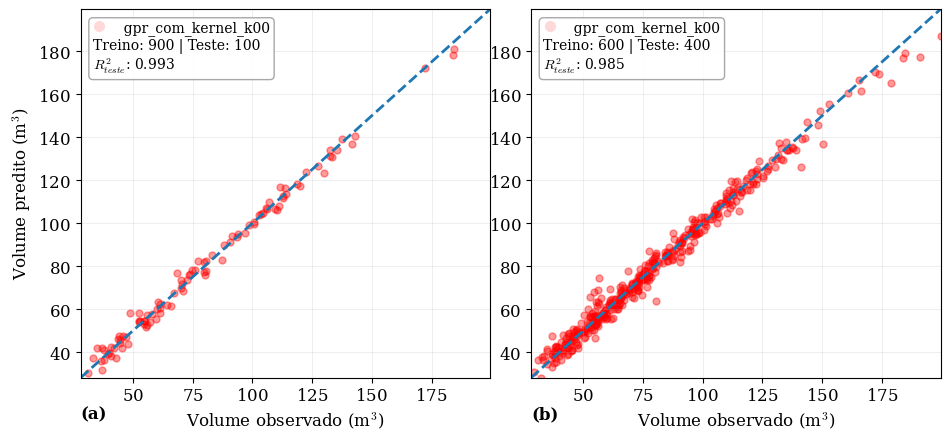

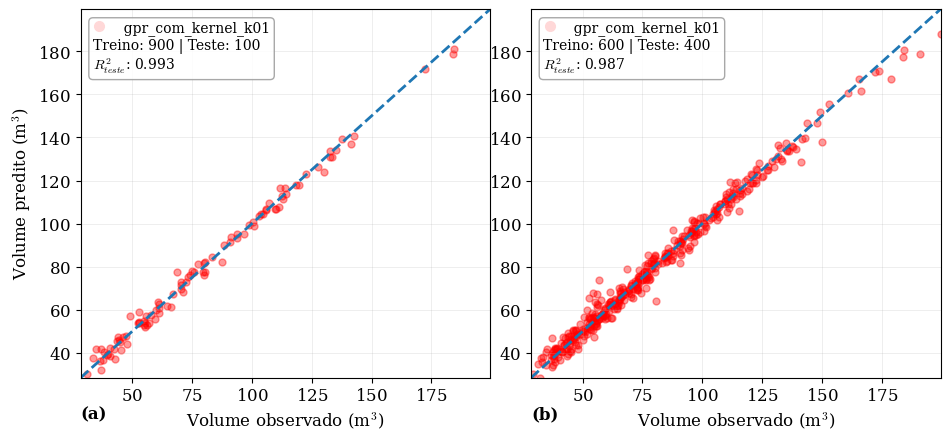

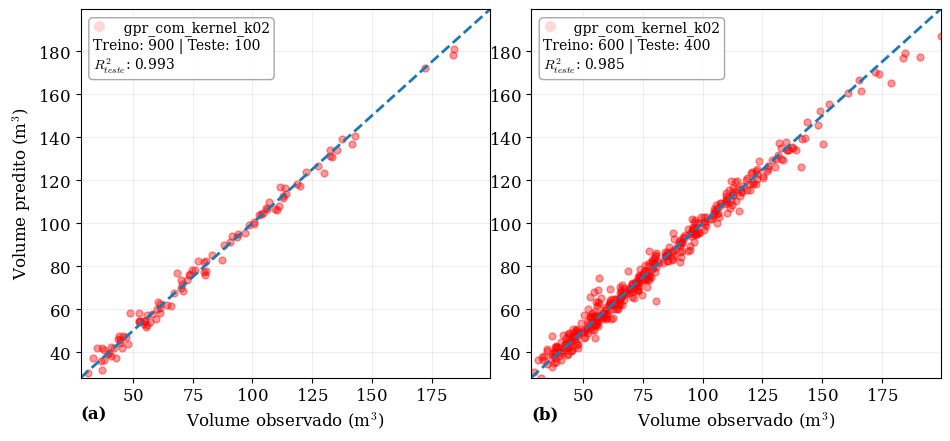

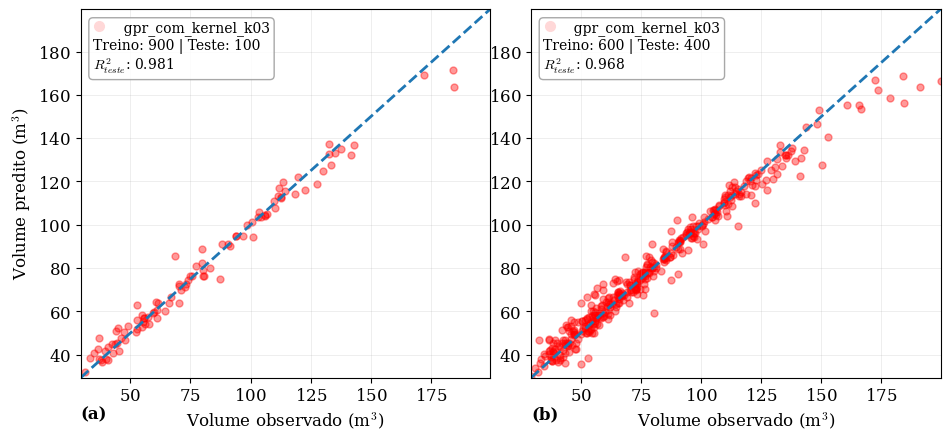

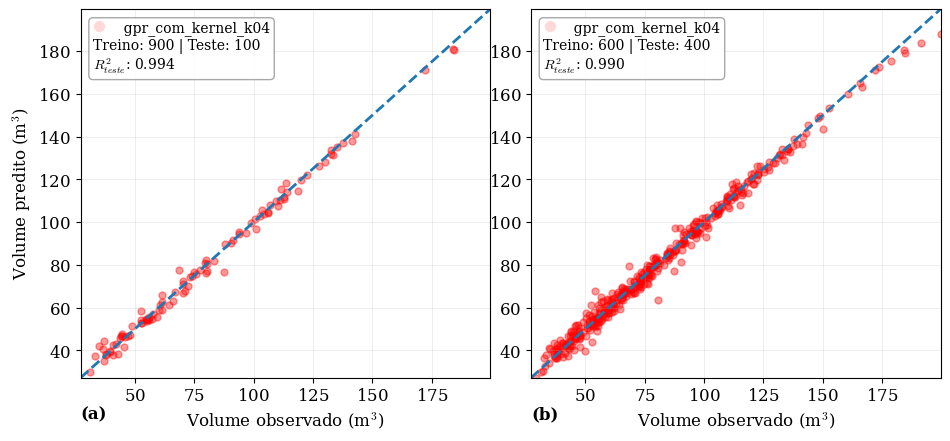

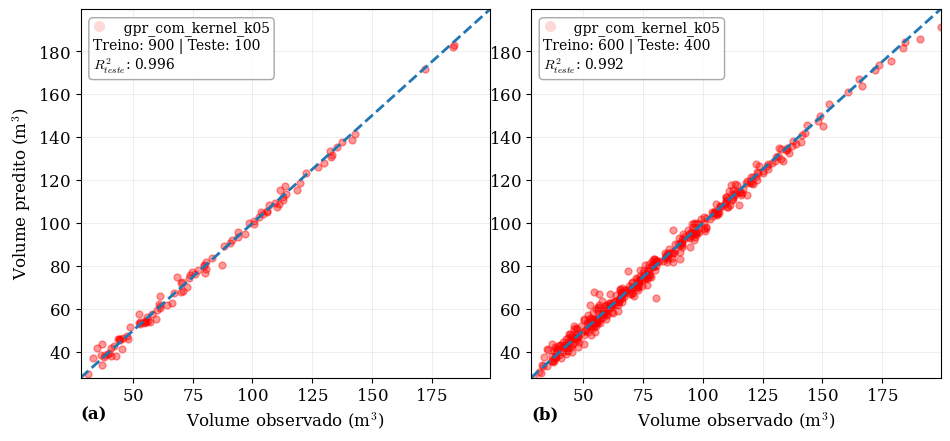

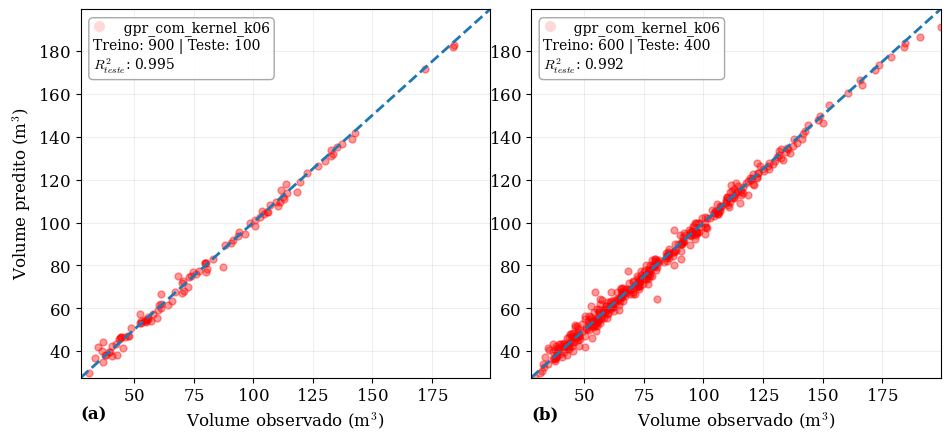

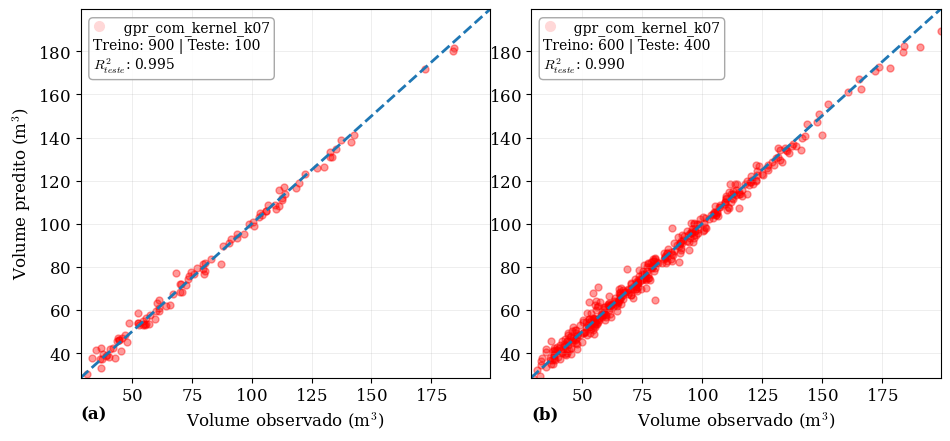

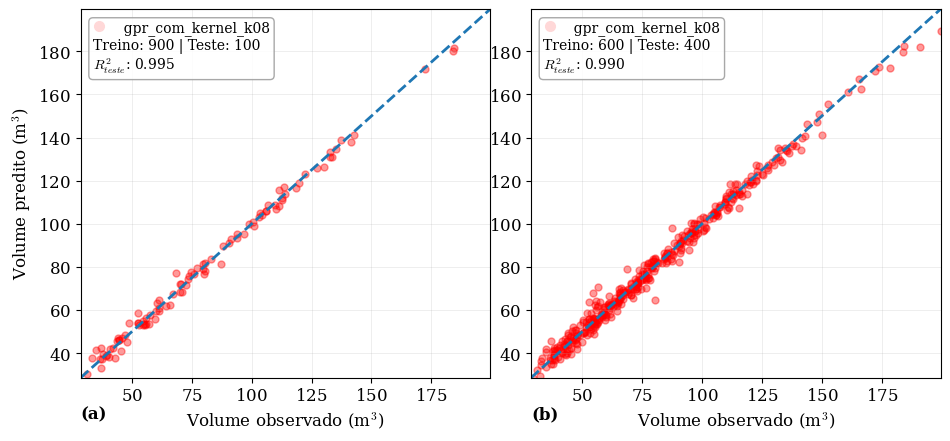

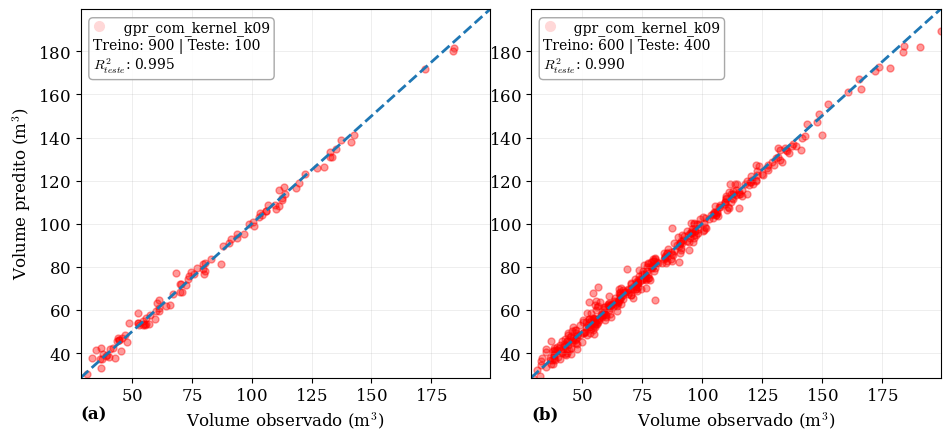

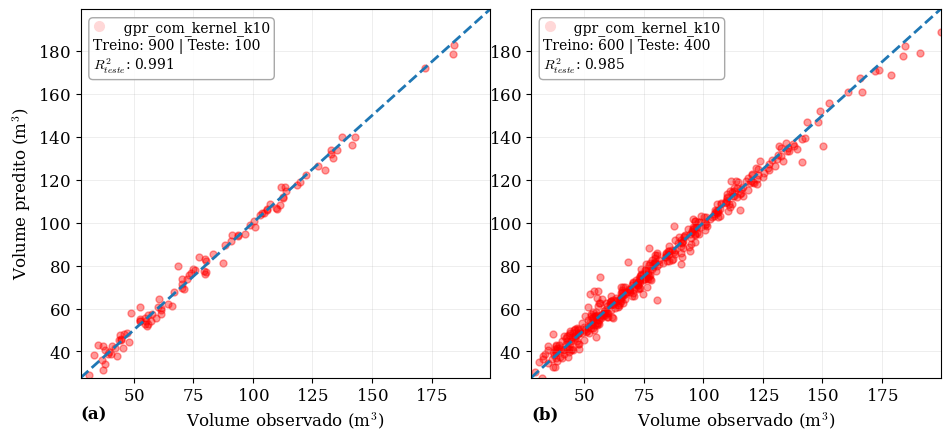

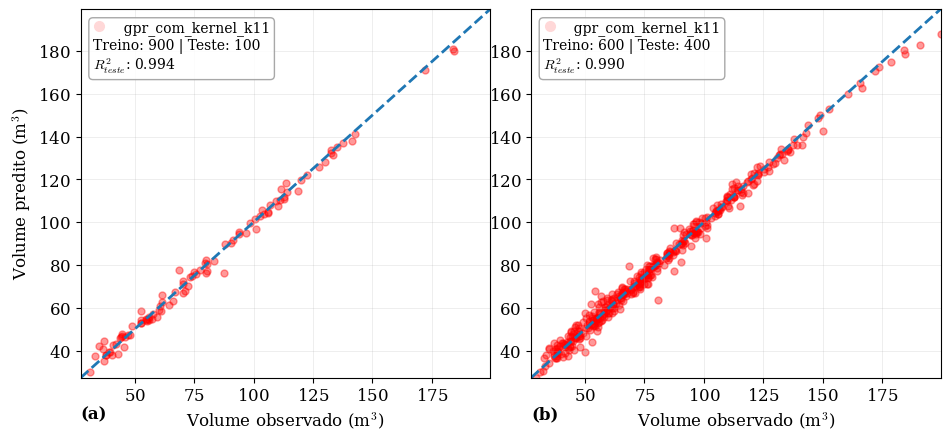

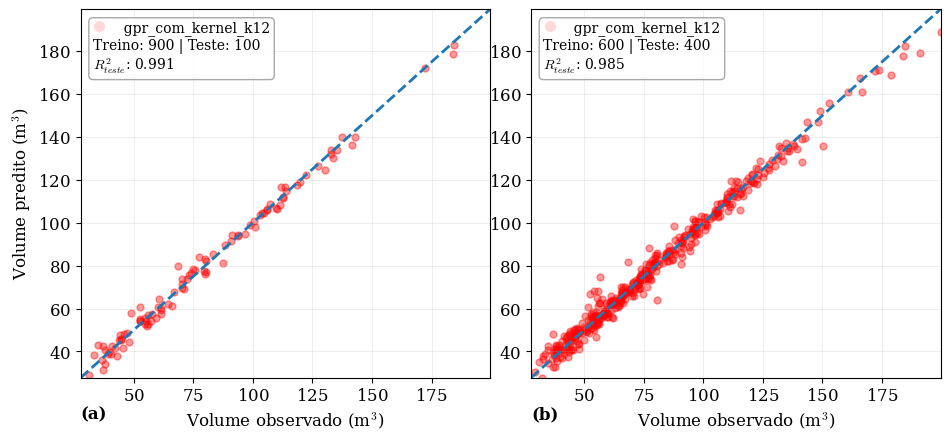

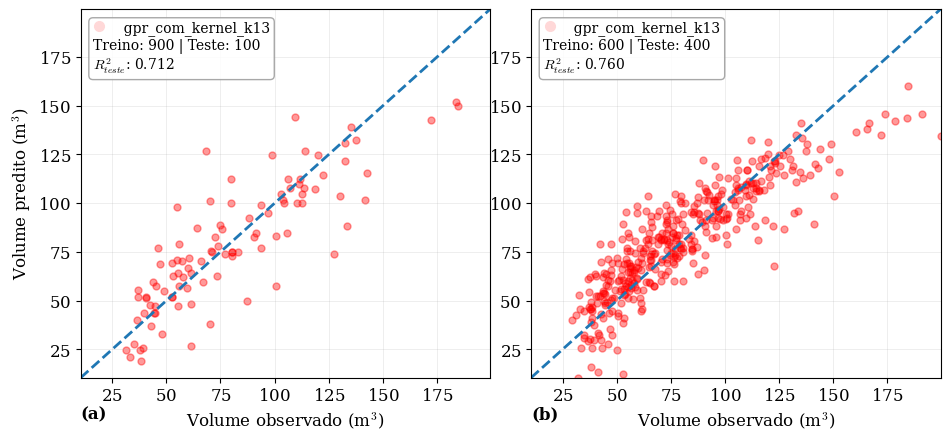

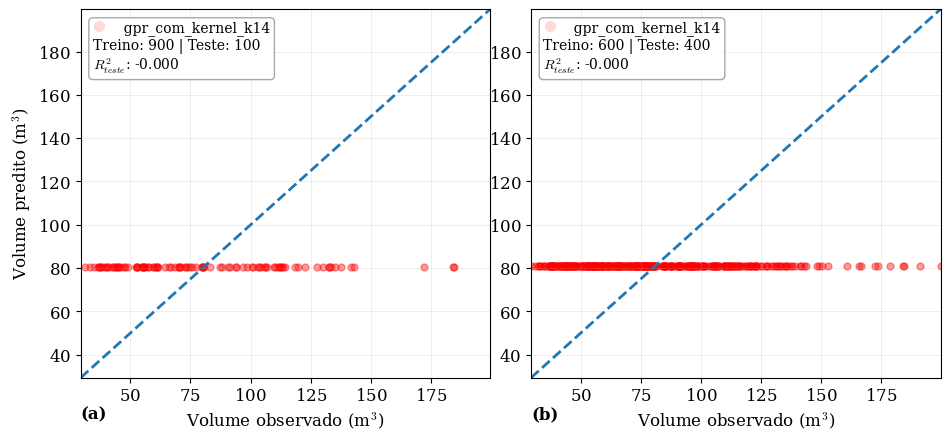

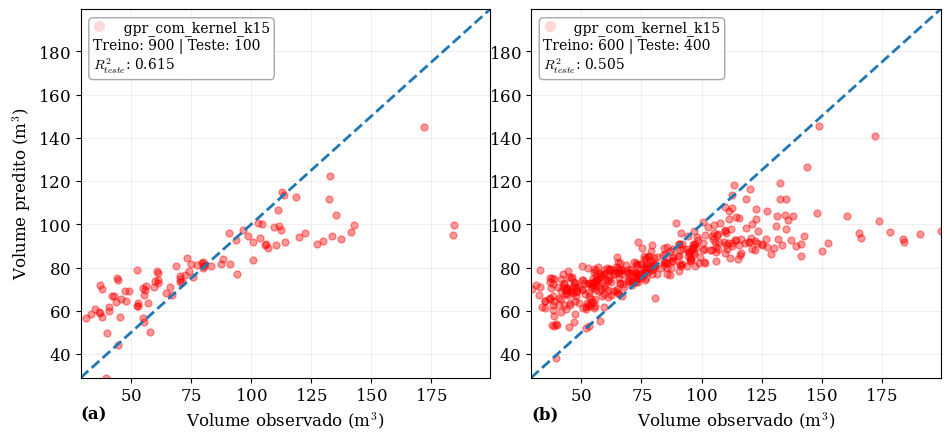

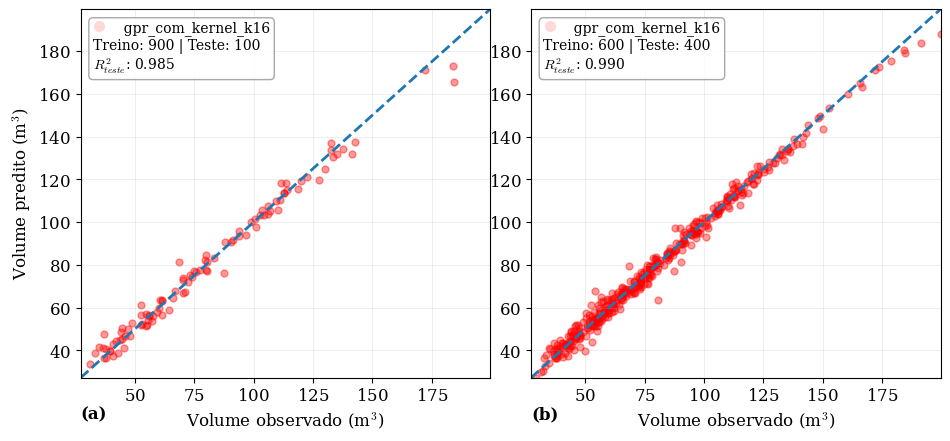

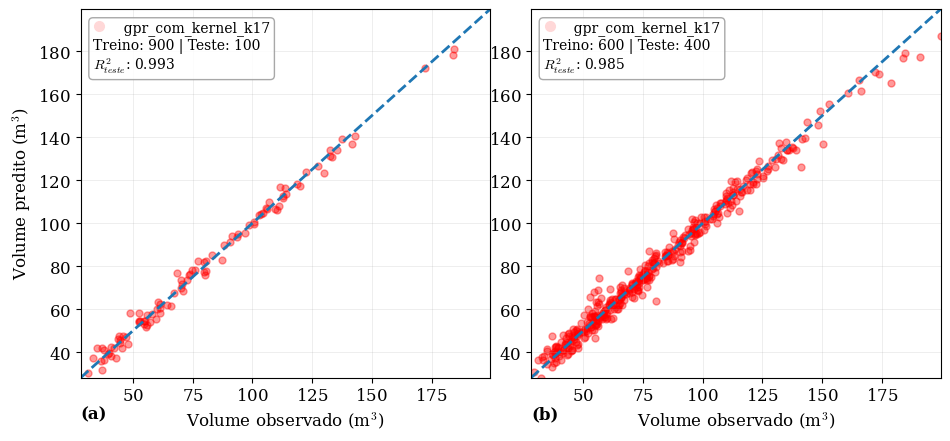

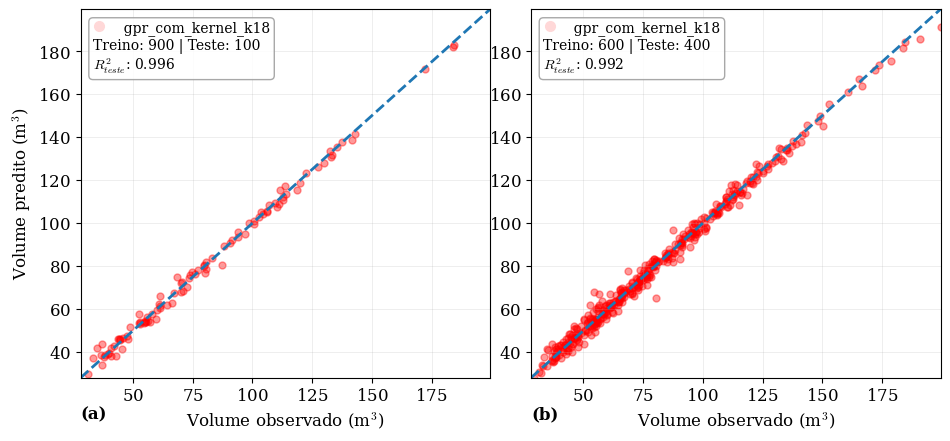

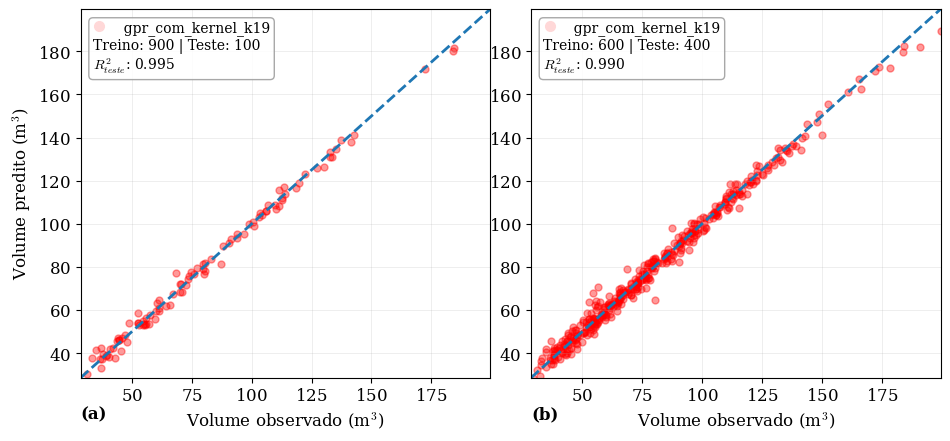

In [99]:
n_train_40 = int((1 - 0.40) * N)  # teste 40% => treino 60%
n_test_40  = N - n_train_40

n_train_10 = int((1 - 0.10) * N)  # teste 10% => treino 90%
n_test_10  = N - n_train_10

for modelo in modelos:
    res_40 = pega_resultado_por_modelo(df_gpr_test_s40, modelo)
    res_10 = pega_resultado_por_modelo(df_gpr_test_s10, modelo)

    plot_side_by_side_02(
        res_low=res_10,
        res_high=res_40,
        n_train1=n_train_10, n_test1=n_test_10,
        n_train2=n_train_40, n_test2=n_test_40,
        out_path=f"z_GPR_test_size_{n_train_10}_vs_{n_train_40}_comparison_{modelo}.png"
    )

In [90]:
def monta_tabela_metricas(df_gpr, penalty, N_total, test_size):
    n_test  = int(test_size * N_total)
    n_train = N_total - n_test
    split_txt = f"{int((1-test_size)*100)}/{int(test_size*100)}"

    linhas = []
    for r in df_gpr:
        linhas.append({
            "Kernel": r["modelo"],
            "Penalidade": f"{penalty:.0e}",
            "Divisão": split_txt,
            "Treino": n_train,
            "Test": n_test,
            "R2_test": float(r["R2_Teste"]),
            "MAE_test": float(r["MAE"]),
            "RMSE_test": float(r["RMSE"]),
        })
    df = pd.DataFrame(linhas)
    return df.sort_values(by="R2_test", ascending=False).reset_index(drop=True)

In [ ]:
df_all_pen= pd.concat([
    monta_tabela_metricas(df_gpr_A, penalty=1e1, N_total=N, test_size=0.30),
    monta_tabela_metricas(df_gpr_B, penalty=1e6, N_total=N, test_size=0.30)
], ignore_index=True)
df_all_pen = (df_all_pen
              .sort_values(by=["R2_test"], ascending=False)
              .reset_index(drop=True)
)
df_all_pen.to_excel("assets/tabela_metricas_gpr_toy_problem_all_penaltys.xlsx", index=False)
df_all_pen

,Kernel,Penalidade,Divisão,Treino,Test,R2_test,MAE_test,RMSE_test
0,gpr_com_kernel_k06,1e+01,70/30,700,300,0.992790,1.955249,2.777136
1,gpr_com_kernel_k05,1e+01,70/30,700,300,0.992641,2.027261,2.805526
2,gpr_com_kernel_k18,1e+01,70/30,700,300,0.992641,2.027261,2.805526
3,gpr_com_kernel_k09,1e+01,70/30,700,300,0.990923,2.291548,3.115925
4,gpr_com_kernel_k19,1e+01,70/30,700,300,0.990923,2.291548,3.115926
5,gpr_com_kernel_k07,1e+01,70/30,700,300,0.990923,2.291548,3.115926
6,gpr_com_kernel_k08,1e+01,70/30,700,300,0.990923,2.291548,3.115926
7,gpr_com_kernel_k04,1e+01,70/30,700,300,0.990896,2.186034,3.120511
8,gpr_com_kernel_k16,1e+01,70/30,700,300,0.990896,2.186034,3.120511
9,gpr_com_kernel_k11,1e+01,70/30,700,300,0.990668,2.213217,3.159362


In [ ]:
df_all_splits = pd.concat([
    monta_tabela_metricas(df_gpr_test_s10, penalty=1e1, N_total=N, test_size=0.10),
    monta_tabela_metricas(df_gpr_test_s20, penalty=1e1, N_total=N, test_size=0.20),
    monta_tabela_metricas(df_gpr_A, penalty=1e1, N_total=N, test_size=0.30),
    monta_tabela_metricas(df_gpr_test_s40, penalty=1e1, N_total=N, test_size=0.40),
    monta_tabela_metricas(df_gpr_test_s50, penalty=1e1, N_total=N, test_size=0.50),
], ignore_index=True)
df_all_splits = (df_all_splits
           .sort_values(by=["MAE_test", "RMSE_test", "Kernel", "R2_test"], ascending=[True, True, True, False])
           .reset_index(drop=True)
)
df_all_splits.to_excel("assets/tabela_metricas_gpr_toy_problem_all_splits.xlsx", index=False)
latex = df_all_splits.to_latex(
    index=False,
    float_format="%.3f",
    caption="Tabela de métricas dos modelos GPR para diferentes divisões treino/teste.",
    label="tab:metricas_gpr_toy_problem_all_splits",
    column_format="lllllll"
    )

df_all_splits

,Kernel,Penalidade,Divisão,Treino,Test,R2_test,MAE_test,RMSE_test
0,gpr_com_kernel_k06,1e+01,90/10,900,100,0.995297,1.768635,2.405972
1,gpr_com_kernel_k18,1e+01,90/10,900,100,0.995543,1.781329,2.342310
2,gpr_com_kernel_k05,1e+01,90/10,900,100,0.995543,1.781330,2.342311
3,gpr_com_kernel_k06,1e+01,80/20,800,200,0.993674,1.900375,2.634916
4,gpr_com_kernel_k05,1e+01,80/20,800,200,0.993724,1.952187,2.624385
...,...,...,...,...,...,...,...,...
95,gpr_com_kernel_k14,1e+01,50/50,500,500,-0.000717,25.749968,32.130307
96,gpr_com_kernel_k14,1e+01,60/40,600,400,-0.000389,26.281949,32.382930
97,gpr_com_kernel_k14,1e+01,70/30,700,300,-0.000296,26.779750,32.710240
98,gpr_com_kernel_k14,1e+01,80/20,800,200,-0.000598,27.244169,33.138294


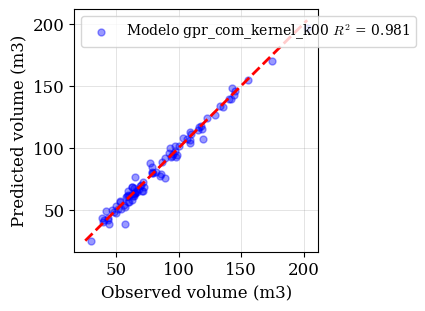

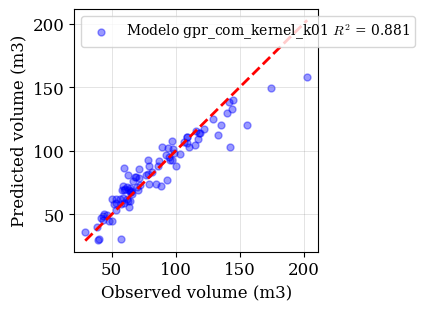

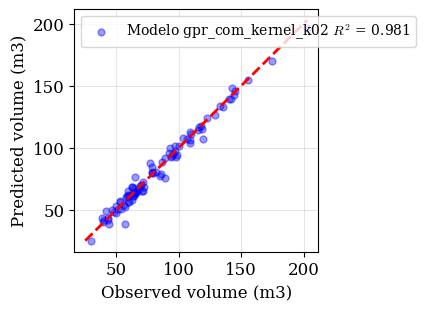

In [ ]:
for i in range(len(df_gpr)):
    ### Figure name and DPI
    dpi = 600                                                    # Change as you wish
    name = f'GPR_{df_gpr[i]["modelo"]}_com_{len(x_treino)}_amostras'
    data = pd.DataFrame({
                            "Observed": list(df_gpr[i]["y_obse"]['volume (m3)']),
                            "Predicted": list(df_gpr[i]["y_pred"]['volume (m3)'])
                        })                          # Change as you wish

    ### Chart dimensions (in centimeters)
    b_cm = 8                                                    # Change as you wish
    h_cm = 8                                                    # Change as you wish
    inches_to_cm = 1 / 2.54
    b_input = b_cm * inches_to_cm
    h_input = h_cm * inches_to_cm

    ### Axis and labels (For LateX font format use the dollar sign $)
    label_x = 'Observed volume (m3)'                                        # Change as you wish
    label_y = 'Predicted volume (m3)'                                       # Change as you wish
    size_label = 12                                             # Change as you wish
    color_label = 'black'                                       # or hexadecimal. Change as you wish
    size_axis = 12                                              # Change as you wish
    color_axis = 'black'                                        # or hexadecimal. Change as you wish

    ### Line
    size_line = 2                                               # Change as you wish
    style_line = '--'                                            # Change as you wish
    color_line = 'red'                                          # or hexadecimal. Change as you wish

    ### Scatter
    alpha_scatter = 0.4                                             # Change as you wish
    color_scatter = 'blue'                                          # Change as you wish
    size_scatter = 25                                               # Change as you wish

    ### Legend
    labels_legend = f'Modelo {df_gpr[i]["modelo"]} $R^2$ = {df_gpr[i]["R2_Teste"]:.3f}'                         # Change as you wish
    size_legend = 10                                            # Change as you wish
    location_legend = 'upper left'                              # Change as you wish - 'best' look up by the best fit

    ### Grid
    on_or_off = True
    line_width_grid = 0.5                                       # Change as you wish
    alpha_grid = 0.3                                            # Change as you wish
    style_grid = '-'                                            # Change as you wish
    color_grid = 'gray'                                         # or hexadecimal. Change as you wish

    ### Max and min axis limits
    lims = [
                min(data.min()),
                max(data.max())
            ]   

    ### Figure
    fig, ax = plt.subplots(figsize=(b_input, h_input))
    ax.tick_params(axis='both', which='major', labelsize=size_axis, colors=color_axis)
    ax.set_xlabel(label_x, fontsize=size_label, color=color_label)
    ax.set_ylabel(label_y, fontsize=size_label, color=color_label)

    ### Title. Do you need a title? Use the cell bellow:
    # ax.set_title('Sine Wave Plot', fontsize=16)

    ### Config grid
    plt.grid(on_or_off, which='both', linestyle=style_grid, linewidth=line_width_grid, color=color_grid, alpha=alpha_grid)

    ### Plot data and legend
    ax.plot(lims, lims, linewidth=size_line, linestyle=style_line, color=color_line,)
    ax.scatter(data["Observed"], data["Predicted"], alpha=alpha_scatter, color=color_scatter, s=size_scatter, label=labels_legend)
    ax.legend(fontsize=size_legend, loc=location_legend)

    ### Save. Do you need save? Use the cell bellow:
    fig.savefig(f'z_{name}.png', dpi=dpi, bbox_inches='tight')
    plt.show()

In [13]:
x_treino, x_teste, y_treino, y_teste= train_test_split(x, y, test_size=0.25, random_state=seed)
print("Quantidade de amostras no treino", len(x_treino))
df_gpr = aprendizado_maquina_paralelo(x_treino, y_treino, x_teste, y_teste)

Quantidade de amostras no treino 225


In [14]:
x_treino, x_teste, y_treino, y_teste= train_test_split(x, y, test_size=0.20, random_state=seed)
print("Quantidade de amostras no treino", len(x_treino))
df_gpr = aprendizado_maquina_paralelo(x_treino, y_treino, x_teste, y_teste)

Quantidade de amostras no treino 240


#### Gráficos

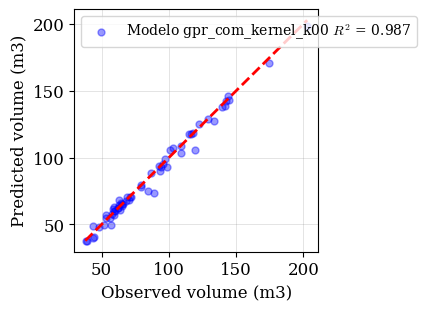

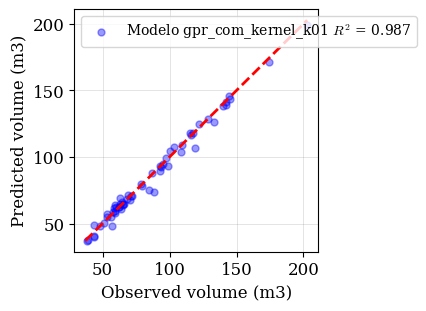

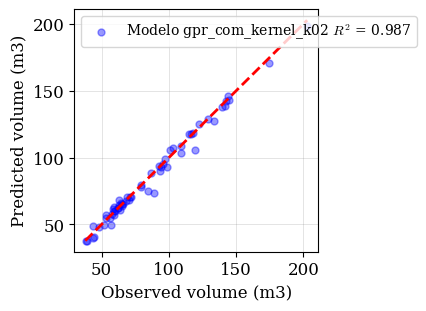

In [ ]:
for i in range(len(df_gpr)):
    ### Figure name and DPI
    dpi = 600                                                    # Change as you wish
    name = f'GPR_{df_gpr[i]["modelo"]}_com_{len(x_treino)}_amostras'
    data = pd.DataFrame({
                        "Observed": list(df_gpr[i]["y_obse"]['volume (m3)']),
                        "Predicted": list(df_gpr[i]["y_pred"]['volume (m3)'])
                    })                          # Change as you wish

    ### Chart dimensions (in centimeters)
    b_cm = 8                                                    # Change as you wish
    h_cm = 8                                                    # Change as you wish
    inches_to_cm = 1 / 2.54
    b_input = b_cm * inches_to_cm
    h_input = h_cm * inches_to_cm

    ### Axis and labels (For LateX font format use the dollar sign $)
    label_x = 'Observed volume (m3)'                                        # Change as you wish
    label_y = 'Predicted volume (m3)'                                       # Change as you wish
    size_label = 12                                             # Change as you wish
    color_label = 'black'                                       # or hexadecimal. Change as you wish
    size_axis = 12                                              # Change as you wish
    color_axis = 'black'                                        # or hexadecimal. Change as you wish

    ### Line
    size_line = 2                                               # Change as you wish
    style_line = '--'                                            # Change as you wish
    color_line = 'red'                                          # or hexadecimal. Change as you wish

    ### Scatter
    alpha_scatter = 0.4                                             # Change as you wish
    color_scatter = 'blue'                                          # Change as you wish
    size_scatter = 25                                               # Change as you wish

    ### Legend
    labels_legend = f'Modelo {df_gpr[i]["modelo"]} $R^2$ = {df_gpr[i]["R2_Teste"]:.3f}'                         # Change as you wish
    size_legend = 10                                            # Change as you wish
    location_legend = 'upper left'                              # Change as you wish - 'best' look up by the best fit

    ### Grid
    on_or_off = True
    line_width_grid = 0.5                                       # Change as you wish
    alpha_grid = 0.3                                            # Change as you wish
    style_grid = '-'                                            # Change as you wish
    color_grid = 'gray'                                         # or hexadecimal. Change as you wish

    ### Max and min axis limits
    lims = [
                min(data.min()),
                max(data.max())
            ]   

    ### Figure
    fig, ax = plt.subplots(figsize=(b_input, h_input))
    ax.tick_params(axis='both', which='major', labelsize=size_axis, colors=color_axis)
    ax.set_xlabel(label_x, fontsize=size_label, color=color_label)
    ax.set_ylabel(label_y, fontsize=size_label, color=color_label)

    ### Title. Do you need a title? Use the cell bellow:
    # ax.set_title('Sine Wave Plot', fontsize=16)

    ### Config grid
    plt.grid(on_or_off, which='both', linestyle=style_grid, linewidth=line_width_grid, color=color_grid, alpha=alpha_grid)

    ### Plot data and legend
    ax.plot(lims, lims, linewidth=size_line, linestyle=style_line, color=color_line,)
    ax.scatter(data["Observed"], data["Predicted"], alpha=alpha_scatter, color=color_scatter, s=size_scatter, label=labels_legend)
    ax.legend(fontsize=size_legend, loc=location_legend)

    ### Save. Do you need save? Use the cell bellow:
    fig.savefig(f'z_{name}_pt.png', dpi=dpi, bbox_inches='tight')
    plt.show()

In [17]:
df_gpr[0]

{'modelo': 'gpr_com_kernel_k00',
 'arquivo': 'modelos\\gpr_com_kernel_k00_pop_240.pkl',
 'R2_Treino': 1.0,
 'R2_Teste': 0.9871836685934934,
 'MAE': 2.6897269789335416,
 'RMSE': 4.011922509120517,
 'y_obse':      volume (m3)
 203    51.473726
 266    84.704794
 152    62.224340
 9      65.879054
 233   108.944798
 226   142.487214
 196   100.493238
 109    58.700570
 5     202.725883
 175    59.352505
 237    93.860512
 57     57.113152
 218   117.653686
 45    115.175999
 182    72.154378
 221    58.038135
 289    97.033905
 211    43.336240
 148    71.029238
 165   144.241440
 78     43.992820
 113    92.569359
 249    88.738842
 250   133.302689
 104   119.225235
 42     38.317242
 281   144.839721
 295    79.256791
 157    65.157430
 238    95.297198
 17     53.084493
 164    64.582768
 33     62.907511
 24    129.093492
 215   139.804356
 119    68.060285
 7      59.396402
 90     63.600059
 46     62.251226
 73     86.756869
 93    142.025481
 76     93.205719
 286    65.281645
 6